In [1]:
import pandas as pd
import numpy as np
import random

np.random.seed(1)
random.seed(1)
TRAININFO = "/data/HitSongPrediction/train_info.tsv"
TRAINRANK =  "/data/HitSongPrediction/train_rank.csv"
TESTINFO = "/data/HitSongPrediction/test_info.tsv"
SUBMISSION = "/data/HitSongPrediction/submission.csv"

# Prepare data
df_i = pd.read_csv(TRAININFO, delimiter='\t',encoding='utf-8')
df_r = pd.read_csv(TRAINRANK)
df_i_train = df_i.merge(df_r, left_on='ID', right_on='ID')
df_i_train["dataset"] = "train"

df_i_test = pd.read_csv(TESTINFO, delimiter='\t',encoding='utf-8')
df_i_test["label"] = np.nan
df_i_test["dataset"] = "test"

df = pd.concat([df_i_train, df_i_test])
df_track_info = pd.read_csv("../../csv/all_track_info.csv")
df = df.merge(df_track_info, left_on='ID', right_on='ID')
df_audio_features = pd.read_csv("../../csv/all_track_audio_features.csv")
df =df.merge(df_audio_features,left_on="ID",right_on="ID", how="left")

# Sort by ID
df = df.sort_values(by=['ID'])
df= df.reset_index()

pd.set_option('display.max_rows', 10957)

df[["title", "album", "album_artist", "artist_name","genre", "composers_name", "track","release_time","length","label"]].head(1000)

title  \
0                               Đêm Chôn Dầu Vượt Biển   
1                                    Mùa Thu Trong Mưa   
2                                    Rồi Ánh Trăng Tan   
3                       Còn Thương Rau Đắng Mọc Sau Hè   
4                                  Người Điên Biết Yêu   
5                                               Đàn Bà   
6                     Yêu Một Người Sống Bên Một Người   
7                                      Giấc Mơ Mình Em   
8                                   Mất Nhau Trong Đời   
9                                    Những Ân Tình Xưa   
10                                    Ở Nơi Đó Em Cười   
11                                      Tình Chấp Nhận   
12                                  Rồi Mai Tôi Đưa Em   
13                                 Thiên Đàng Đánh Mất   
14                                             Vai Phụ   
15                                   Tình Nhỏ Mau Quên   
16                                      Rồi 30 Năm Qua   
17                                   Chơi Vơi Dòng Đời   
18                                 Dòng Sông Quê Hương   
19                                    Hòa Bình Hoan Ca   
20                                  Chúc Mừng Xuân Mới   
21                                     Bên Đời Đã Vắng   
22                                     Đã Xa Cuộc Tình   
23                                    Chia Tay Ngày Hè   
24                                       Khúc Mưa Buồn   
25                             Xin Gọi Nhau Là Cố Nhân   
26                                       Anh Thì Không   
27                               Giọt Nước Mắt Cho Đời   
28                                   Khúc Hát Yên Bình   
29                                        Self Control   
30                                              Ước Gì   
31                                       Giữa Đôi Mình   
32                                  Viễn Khúc Việt Nam   
33                                             Hạ Buồn   
34                                   Tiếng Hát Nửa Vời   
35                                             Một Nhà   
36                                 Cố Yêu Lại Càng Đau   
37                                     Mong Gặp Lại Em   
38                                              Ảo Ảnh   
39                                     Thư Cho Vợ Hiền   
40                                     Mùa Xuân Của Mẹ   
41                                        Lời Nói Cuối   
42                                       Miền Trung Ơi   
43                                     Em Gái Miền Tây   
44                                  Đau Lòng Lý Ngựa Ô   
45                                   Mẹ Ơi Đời Nghệ Sĩ   
46                                              Về Nhà   
47                                     Mùa Hoa Trở Lại   
48                                      Chuyện Hoa Sim   
49                                        Hoa Trinh Nữ   
50                                      Hai Vì Sao Lạc   
51                                   Tình Yêu Cách Trở   
52                                      Tâm Sự Đời Tôi   
53                                  Người Đi Ngoài Phố   
54                                        Mối Tình Đầu   
55                                     Lại Gần Hôn Anh   
56                                Tình Lúa Duyên Trăng   
57                      Quảng Trị Dòng Sông Thương Nhớ   
58                    Rap News (Zing Music Space 2016)   
59                   Chờ Người Nơi Ấy (The Remix 2017)   
60                Bống Bống Bang Bang (The Remix 2017)   
61                                Khúc Xuân Yêu Thương   
62                               Cục Cưng Của Lòng Anh   
63                                 Em Sẽ Về Đâu (Beat)   
64                                   Put Your Hands Up   
65    Trở Về Đi (Tỉnh Giấc Tôi Thấy Mình Trong Ai OST)   
66                                           Love Xuân   
67                     Liên Khúc Đón Xuân Thần Tài Đến   
68                                     Hương Tì

In [ ]:
df["isSingleAlbum"] = [ 1 if "Single" in t else 0 for t in df["album"]]

title_features = ["isSingleAlbum"]
fig, axes = plt.subplots(5, 2, figsize=(20, 50))
for feature, ax in zip(title_features, axes.flat):
    sns.violinplot(x=feature, y="label", data=df[df.dataset=="train"], inner="quartile",ax=ax)

In [13]:
# pd.set_option('display.max_rows', 10000)

df["num_same_title"] = df.groupby("title")["title"].transform("count")
df1 = df[df.num_same_title>1]
df1 = df1.sort_values(by=['title'])
df1[["title", "album", "album_artist", "artist_name","genre", "composers_name", "track","release_time","length","label"]]
# df[[["title", "album", "album_artist", "artist_name","genre", "composers_name", "track","release_time","length","label"]]]

title  \
1407                                 Ai Cho Tôi Tình Yêu   
6790                                 Ai Cho Tôi Tình Yêu   
544                                  Ai Cho Tôi Tình Yêu   
4699                                 Ai Cho Tôi Tình Yêu   
1861                                 Ai Cho Tôi Tình Yêu   
2133                                 Ai Cho Tôi Tình Yêu   
7526                                 Ai Cho Tôi Tình Yêu   
5244                                 Ai Cho Tôi Tình Yêu   
979                                  Ai Cho Tôi Tình Yêu   
2365                                 Ai Cho Tôi Tình Yêu   
4828                                 Ai Cho Tôi Tình Yêu   
922                                         Ai Khổ Vì Ai   
6104                                        Ai Khổ Vì Ai   
6984                                        Ai Khổ Vì Ai   
5582                                        Ai Khổ Vì Ai   
8722                                        Ai Khổ Vì Ai   
5363                                        Ai Khổ Vì Ai   
812                                         Ai Khổ Vì Ai   
2141                                        Ai Khổ Vì Ai   
8692                                        Ai Khổ Vì Ai   
6534                                        Ai Khổ Vì Ai   
2269                                   Ai Lên Xứ Hoa Đào   
2140                                   Ai Lên Xứ Hoa Đào   
7060                                        Ai Ra Xứ Huế   
3870                                        Ai Ra Xứ Huế   
4805                                        Ai Ra Xứ Huế   
5608                         Anh Biết Em Đi Chẳng Trở Về   
9024                         Anh Biết Em Đi Chẳng Trở Về   
5913                         Anh Biết Em Đi Chẳng Trở Về   
4287                                 Anh Cho Em Mùa Xuân   
8828                                 Anh Cho Em Mùa Xuân   
3117                                 Anh Cho Em Mùa Xuân   
10151                                Anh Cho Em Mùa Xuân   
3103                                 Anh Cho Em Mùa Xuân   
9940                            Anh Chẳng Sao Mà (Cover)   
9538                            Anh Chẳng Sao Mà (Cover)   
3451                                       Anh Còn Nợ Em   
6023                                       Anh Còn Nợ Em   
9114                                       Anh Còn Nợ Em   
5409                                       Anh Còn Nợ Em   
6548                                       Anh Còn Nợ Em   
10189                                      Anh Còn Nợ Em   
2077                                       Anh Còn Nợ Em   
9496                                       Anh Còn Nợ Em   
794                                 Anh Em Hãy Cho Họ Ăn   
8413                                Anh Em Hãy Cho Họ Ăn   
1656                                       Anh Hãy Về Đi   
8962                                       Anh Hãy Về Đi   
6148                         Anh Không Muốn Làm Người Lạ   
6970                         Anh Không Muốn Làm Người Lạ   
6969                  Anh Không Muốn Làm Người Lạ (Beat)   
6149                  Anh Không Muốn Làm Người Lạ (Beat)   
2390                                    Anh Sẽ Hồi Hương   
414                                     Anh Sẽ Hồi Hương   
9774                                     Anh Về Miền Tây   
3806                                     Anh Về Miền Tây   
7666                                     Anh Về Miền Tây   
4391                                     Anh Về Miền Tây   
5078                                   Anh Về Quảng Ngãi   
2314                                   Anh Về Quảng Ngãi   
8825                                       Anh Về Với Em   
7994                                       Anh Về Với Em   
9706                      Anh Đang Ở Đâu Đấy Anh (Cover)   
9833                      Anh Đang Ở Đâu Đấy Anh (Cover)   
9026                                      Ba Tháng Tạ Từ   
4956                                      Ba Tháng Tạ Từ   
9520                           

In [ ]:


def no_bracket(tit):
    return tit.split('(')[0]

df['no_bracket_title'] = df.title.apply(lambda x: no_bracket(x))
df["num_same_title"] = df.groupby("no_bracket_title")["no_bracket_title"].transform("count")

df1 = df[df.num_same_title>1]
df1 = df1.sort_values(by=['no_bracket_title'])
pd.set_option('display.max_rows', 1000)

df1[["title",'no_bracket_title', "album", "album_artist", "artist_name","genre", "composers_name", "track","release_time","length","label"]]

In [8]:
df["isEDM"] = [ 1 if "EDM" in t else 0 for t in df["title"]]
df["isDJ"] = [ 1 if "DJ" in t else 0 for t in df["title"]]
df["isMix"] = [ 1 if "Mix" in t else 0 for t in df["title"]]
df["isLive"] = [ 1 if "Live" in t else 0 for t in df["title"]]

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

title_features = ["isEDM", "isDJ","isMix","isLive"]
fig, axes = plt.subplots(5, 2, figsize=(20, 50))
for feature, ax in zip(title_features, axes.flat):
    sns.violinplot(x=feature, y="label", data=df[df.dataset=="train"], inner="quartile",ax=ax)



ValueError: Could not interpret input 'isEDM'

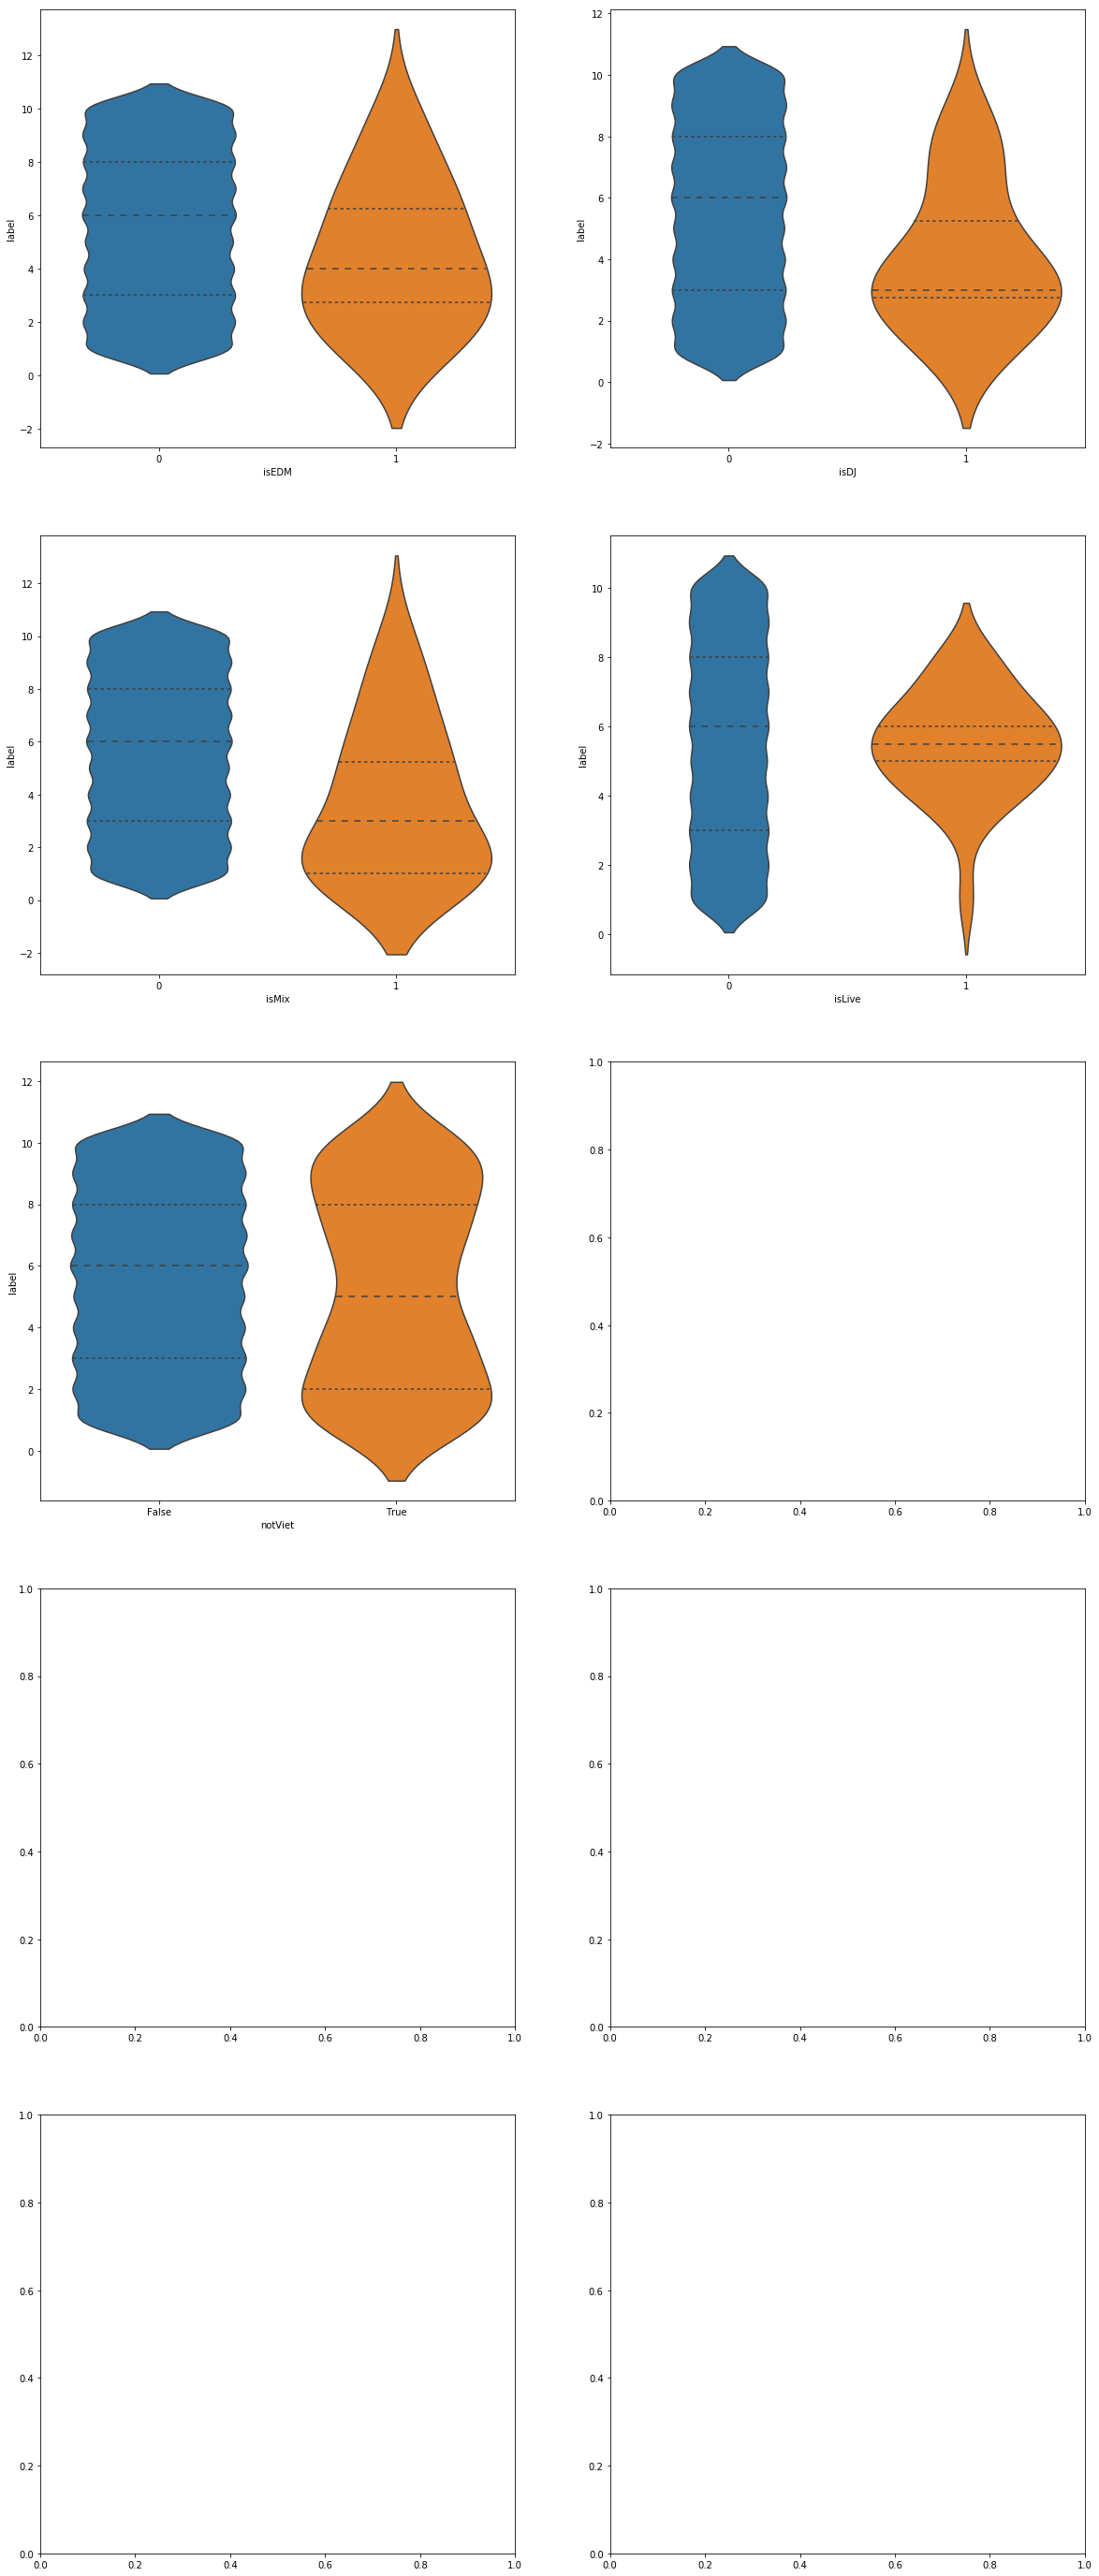

In [9]:
from unidecode import unidecode
def viet_or_not(tit):
    return tit == unidecode(tit)
df["notViet"] = df.title.apply(lambda x: viet_or_not(x))
title_features = ["isEDM", "isDJ","isMix","isLive","notViet"]
fig, axes = plt.subplots(5, 2, figsize=(20, 50))
for feature, ax in zip(title_features, axes.flat):
    sns.violinplot(x=feature, y="label", data=df[df.dataset=="train"], inner="quartile",ax=ax)


In [ ]:
import seaborn as sns
# Fill nan album
print("There is {} ratio is nan album".format(len(df[df["album"].isnull()])/len(df)))
df["album"]  = df["album"].fillna("")
df["len_album_name"] = df["album"].apply(lambda x: len(x.split(" ")))
df["isRemixAlbum"] = [ 1 if "Remix" in t else 0 for t in df["album"]]
df["isOSTAlbum"] = [ 1 if "OST" in t else 0 for t in df["album"]]
df["isSingleAlbum"] = [ 1 if "Single" in t else 0 for t in df["album"]]
df["isBeatAlbum"] = [ 1 if "Beat" in t else 0 for t in df["album"]]
df["isTopHitAlbum"] = [ 1 if "Top Hits" in t else 0 for t in df["album"]]
df["isCoverAlbum"] = [ 1 if "Cover" in t else 0 for t in df["album"]]
df["isEPAlbum"] = [ 1 if "EP" in t else 0 for t in df["album"]]
df["isLienKhucAlbum"] = [ 1 if "Liên Khúc" in t else 0 for t in df["album"]]

df["album_name_is_title_name"]= [1 if r.title in r.album  else 0 for i,r in df.iterrows() ]
df["album"] = df["album"].astype('category')
df["album"] =  df["album"].cat.codes

df["artist_name_cat"] = df["artist_name"].astype('category')
df["artist_name_cat"] =  df["artist_name_cat"].cat.codes
df["composers_name_cat"] = df["composers_name"].astype('category')
df["composers_name_cat"] =  df["composers_name_cat"].cat.codes
df["copyright_cat"] = df["copyright"].astype('category')
df["copyright_cat"] =  df["copyright_cat"].cat.codes

import re
def get_min_artist_id(s):
    ps = re.split(',|\.',s)
    ps = [int(p) for p in ps]
    return np.min(ps)

def get_max_artist_id(s):
    ps = re.split(',|\.',s)
    ps = [int(p) for p in ps]
    return np.max(ps)

df["artist_id_min"]=  df["artist_id"].apply(lambda x: get_min_artist_id(x))
df["artist_id_min_cat"] = df["artist_id_min"].astype('category')
df["artist_id_min_cat"] =  df["artist_id_min_cat"].cat.codes

df["composers_id_min"]=  df["composers_id"].apply(lambda x: get_min_artist_id(x))
df["composers_id_min_cat"] = df["composers_id_min"].astype('category')
df["composers_id_min_cat"] =  df["composers_id_min_cat"].cat.codes

df["artist_id_max"]=  df["artist_id"].apply(lambda x: get_max_artist_id(x))
df["artist_id_max_cat"] = df["artist_id_max"].astype('category')
df["artist_id_max_cat"] =  df["artist_id_max_cat"].cat.codes

df["composers_id_max"]=  df["composers_id"].apply(lambda x: get_max_artist_id(x))
df["composers_id_max_cat"] = df["composers_id_max"].astype('category')
df["composers_id_max_cat"] =  df["composers_id_max_cat"].cat.codes

#New feature
# df["group_album_artist_id_min_cat"] = df.groupby(["album","artist_id_min_cat"]).ngroup()
# df["group_album_artist_id_min_cat"] = df["group_album_artist_id_min_cat"].astype("category").cat.codes
# df["group_album_artist_id_max_cat"] = df.groupby(["album","artist_id_max_cat"]).ngroup()
# df["group_album_artist_id_max_cat"] = df["group_album_artist_id_max_cat"].astype("category").cat.codes


# Fill genre
print("There is {} ratio is nan genre".format(len(df[df["genre"].isnull()])/len(df)))
df["genre"]  = df["genre"].fillna("No genre")
df["genre"] = df["genre"].astype('category')
df["genre"] =  df["genre"].cat.codes

# Fill album_artist
print("There is {} ratio is nan album_artist".format(len(df[df["album_artist"].isnull()])/len(df)))
df["album_artist"]  = df["album_artist"].fillna("No album_artist")
df["album_artist_contain_artistname"]= [1 if r.album_artist in r.artist_name  else 0 for i,r in df.iterrows() ]
df["album_artist"] = df["album_artist"].astype('category')
df["album_artist"] =  df["album_artist"].cat.codes

# Fill track
print("There is {} ratio is nan track".format(len(df[df["track"].isnull()])/len(df)))
df["track"]  = df["track"].fillna("(1, 1)")
df["istrack11"] = df["track"] == "(1, 1)"
def tracknum_to_value(track_num):
    try:
        
        track_num = make_tuple(track_num)
        if track_num[0] is not None:
            return float(track_num[0]) / float(track_num[1])
        else:
            return 1.0
    except:
        return 1.0

df["track"] = df["track"].apply(lambda t: tracknum_to_value(t))


# Fill lyric
print("There is {} ratio is nan lyric".format(len(df[df["lyric"].isnull()])/len(df)))
df["lyric"]  = df["lyric"].fillna("")
df["islyric"] = df["lyric"].apply(lambda x:  True if len(x)  else False)
df["num_line_lyric"] = df["lyric"].apply(lambda x : len(x.split("\r")))


#--------------------------------------------------------
from dateutil import relativedelta
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from ast import literal_eval as make_tuple
df['no_artist'] = df.artist_name.apply(lambda x: len(x.split(",")))
df['no_composer'] = df.composers_name.apply(lambda x: len(x.split(",")))
df["freq_artist"] = df.groupby('artist_id')['artist_id'].transform('count').astype('float')
df["freq_composer"] = df.groupby('composers_id')['composers_id'].transform('count').astype('float')
df["freq_artist_min"] = df.groupby('artist_id_min_cat')['artist_id_min_cat'].transform('count').astype('float')
df["freq_composer_min"] = df.groupby('composers_id_min_cat')['composers_id_min_cat'].transform('count').astype('float')

df["num_album_per_min_artist"] = df.groupby(['artist_id_min_cat','album'])['album'].transform('count').astype('float')
df["num_album_per_min_composer"] = df.groupby(['composers_id_min','album'])['album'].transform('count').astype('float')


df["datetime"] = pd.to_datetime(df.release_time)
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["hour"] = df["datetime"].dt.hour
df["day"] = df["datetime"].dt.day
df["dayofyear"] = df["datetime"].dt.dayofyear
df["weekday"] = df["datetime"].dt.weekday
from datetime import date 
import holidays 

in_holidays = holidays.HolidayBase() 
for i in range(26,32):
    in_holidays.append(str(i)+'-01-2017')
in_holidays.append('01-02-2017')
for i in range(14,21):
    in_holidays.append(str(i)+'-02-2018')
in_holidays.append('30-04-2017')
in_holidays.append('30-04-2018')
in_holidays.append('01-01-2017')
in_holidays.append('01-01-2018')
in_holidays.append('14-02-2017')
in_holidays.append('14-02-2018')
in_holidays.append('08-03-2017')
in_holidays.append('08-03-2018')
in_holidays.append('01-05-2017')
in_holidays.append('01-05-2018')
in_holidays.append('06-04-2017')
in_holidays.append('25-04-2018')
in_holidays.append('01-06-2017')
in_holidays.append('01-06-2018')
in_holidays.append('04-10-2017')
in_holidays.append('24-09-2018')
in_holidays.append('20-10-2017')
in_holidays.append('20-10-2018')
in_holidays.append('20-11-2017')
in_holidays.append('20-11-2018')
in_holidays.append('24-12-2017')
in_holidays.append('24-12-2018')
df['isHoliday'] = df.release_time.apply(lambda x: x in in_holidays)



df["len_of_songname"] = df["title"].apply(lambda x: len(x.split(" ")))
df["isRemix"] = [ 1 if "Remix" in t else 0 for t in df["title"]]
df["isOST"] = [ 1 if "OST" in t else 0 for t in df["title"]]
df["isBeat"] = [ 1 if "Beat" in t else 0 for t in df["title"]]
df["isVersion"] = [ 1 if "Version" in t else 0 for t in df["title"]]
df["isCover"] = [ 1 if "Cover" in t else 0 for t in df["title"]]
df["isLienKhuc"] = [ 1 if "Liên Khúc" in t else 0 for t in df["title"]]



def find_num_song_release_in_final_month(df, day):
    month5th = day + relativedelta.relativedelta(months=5)
    month6th = day + relativedelta.relativedelta(months=6)  
    return len(df.datetime[(df.datetime >= month5th)&(df.datetime<=month6th)])



df["num_song_release_in_final_month"] = df.datetime.apply(lambda d:find_num_song_release_in_final_month(df ,d))

#It seems like all songs on albums release at the same time, so groupby by release_time will create album 
df["album_right"] = df.groupby(df.release_time).ngroup().astype("category").cat.codes
df["day_release"] = df.groupby(["year","dayofyear"]).ngroup().astype("category").cat.codes
df["numsongInAlbum"] = df.groupby("album_right")["album_right"].transform("count")
df["isSingleAlbum_onesong"]= df["isSingleAlbum"] & (df["numsongInAlbum"]==1)

In [ ]:
from datetime import datetime
import re

def split_id(s):
    return re.split(',|\.',s)

m = df.artist_id.unique()
idx_lst = []
for idx in m:
    ps = split_id(idx)
    for i in ps:
        idx_lst.append(i)
        
id_lst = list(set(idx_lst))

def condition(df, artist_id):
    r = df.artist_id.apply(lambda x: artist_id in split_id(x))
    return r

df_train = df[df.dataset=="train"]
data= [df_train[condition(df_train, artist_id)].label.agg(["mean","std","count"]) for artist_id in id_lst]
new_df = pd.DataFrame(data=data)
new_df["artist_id"] =  id_lst

new_df.dropna(inplace=True)
new_df.set_index('artist_id', inplace=True)
art_dict = new_df.to_dict()

def best_count_id(values):
    ids = split_id(values)
    temp_mean = 0
    temp_id = str(min([int(a) for a in ids]))
    for id in ids:
        try:
            if art_dict['count'][id] > temp_mean:
                temp_mean = art_dict['count'][id]
                temp_id = id
        except:
            temp_mean = temp_mean
            temp_id = temp_id
    return temp_id
    
df['artist_count_id'] = df['artist_id'].apply(best_count_id)

def best_mean_id(values):
    ids = split_id(values)
    temp_mean = 10
    temp_id = str(min([int(a) for a in ids]))
    for id in ids:
        try:
            if art_dict['mean'][id] < temp_mean:
                temp_mean = art_dict['mean'][id]
                temp_id = id
        except:
            temp_mean = temp_mean
            temp_id = temp_id
    return temp_id

df['artist_mean_id'] = df['artist_id'].apply(best_mean_id)

def best_std_id(values):
    ids = split_id(values)
    temp_std = 10
    temp_id = str(min([int(a) for a in ids]))
    for id in ids:
        try:
            if art_dict['std'][id] < temp_std:
                temp_std = art_dict['std'][id]
                temp_id = id
        except:
            temp_std = temp_std
            temp_id = temp_id
    return temp_id

df['artist_std_id'] = df['artist_id'].apply(best_std_id)

df['artist_mean_id'] = df['artist_mean_id'].astype('category')
df['artist_std_id'] = df['artist_std_id'].astype('category')
df['artist_count_id'] = df['artist_count_id'].astype('category')

In [ ]:
from functools import reduce

def create_album_score_lookup_table(df):
    data = df.groupby('album_right').label.agg(["mean","std","count"])
    return data

def create_artist_score_lookup_table(df):
    def split_id(s):
        return re.split(',|\.',s)
    
    def mask_row_contain_artist_id(df, artist_id):
        r = df.artist_id.apply(lambda x: artist_id in split_id(x))
        return r
    
    # Get all artist ids
    artist_group = df.artist_id.unique()
    artist_ids = reduce(lambda l,e: l+split_id(e), artist_group, [])
    artist_ids = list(set(artist_ids))
    # Get data
    data= [df[mask_row_contain_artist_id(df, artist_id)].label.agg(["mean","std","count", "median"]) 
                                                        for artist_id in artist_ids]
    new_df = pd.DataFrame(data=data)
    new_df["artist_id"] =  artist_ids
    return new_df.set_index("artist_id")
    




In [ ]:
def get_field_by_key(table, k, field="mean"):
    if k in table.index:
        return table.loc[k][field]
    return np.nan

def get_value_by_key(table, k):
    if k in table.index:
        return table.loc[k], False
    return np.nan, True

def assign_value(album_table, artist_table, r):
    d1,isnul1 = get_value_by_key(album_table, r.album_right)
    d2,isnul2 = get_value_by_key(artist_table, r.artist_id_min_cat)
#     print(type(d2),isnul2)
    if isnul1 and isnul2:
        return np.nan
    elif isnul1 and d2["std"] <2:
        return d2["mean"]
    elif isnul2 and d1["std"] <2:
        return d1["mean"]
    
    elif not isnul1 and d1["std"] <2 and not isnul2 and d2["std"] < 2:
        return d1["mean"] 
    
    
    return np.nan

def assign_value_album(album_table, r):
    d1,isnul1 = get_value_by_key(album_table, r.album_right)
    
    if not isnul1 and d1["std"] <3.5:
        return d1["std"]
    
    return np.nan
    
def assign_value_artist(artist_table, r):
    d1,isnul1 = get_value_by_key(artist_table, r.artist_id_min_cat)
    
    if not isnul1 and d1["std"] <3.5:
        return d1["std"]
    
    return np.nan
    

In [ ]:
from sklearn.neural_network import MLPRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from math import sqrt

from sklearn.model_selection import train_test_split

# chosen_features = ["album_right", "istrack11", "no_artist", "no_composer","freq_artist", "freq_composer","year", "month","hour", "day", "len_of_songname", 
#                    "isRemix", "isOST", "isBeat", "isVersion", "isCover",  "num_song_release_in_final_month",
#                   "length", "genre", "track","album_artist", "islyric", "album_artist_contain_artistname",
#                   "len_album_name", "isRemixAlbum", "isOSTAlbum", "isSingleAlbum", "album_name_is_title_name",
#                   "isBeatAlbum", "isCoverAlbum", "artist_name_cat","composers_name_cat","copyright_cat" ,
#                   "artist_id_min_cat", "composers_id_min_cat",  "artist_id_max_cat", "composers_id_max_cat", 
#                    "freq_artist_min", "freq_composer_min","dayofyear","weekday","isHoliday",
#                   "num_album_per_min_artist", "num_album_per_min_composer", 
#                    "numsongInAlbum","isSingleAlbum_onesong" ]

chosen_features = [ "album_right", "istrack11", "no_artist", "no_composer","freq_artist", "freq_composer","year", "month","hour", "day", "len_of_songname", 
                   "isRemix", "isOST", "isBeat", "isVersion", "isCover",  "num_song_release_in_final_month",
                  "length", "genre", "track","album_artist", "islyric", "album_artist_contain_artistname",
                  "len_album_name", "isRemixAlbum", "isOSTAlbum", "isSingleAlbum", "album_name_is_title_name",
                  "isBeatAlbum", "isCoverAlbum", "artist_id_cat","composers_id_cat","copyright_cat" ,
                  "artist_id_min_cat",  "artist_id_max_cat","composers_id_min_cat",
                   "freq_artist_min", "freq_composer_min","dayofyear","weekday",
                  "num_album_per_min_artist", "num_album_per_min_composer", 
                   "numsongInAlbum","isSingleAlbum_onesong","artist_mean_id", "artist_std_id" ,"artist_count_id" ]

# chosen_features = [  "istrack11", "no_artist", "no_composer","freq_artist", "freq_composer","year", "month","hour", "day", "len_of_songname", 
#                    "isRemix", "isOST", "isBeat", "isVersion", "isCover",  "num_song_release_in_final_month",
#                   "length", "genre", "track", "islyric", "album_artist_contain_artistname",
#                   "len_album_name", "isRemixAlbum", "isOSTAlbum", "isSingleAlbum", "album_name_is_title_name",
#                   "isBeatAlbum", "isCoverAlbum","copyright_cat" ,
#                    "freq_artist_min", "freq_composer_min","dayofyear","weekday",
#                   "num_album_per_min_artist", "num_album_per_min_composer", 
#                    "numsongInAlbum","isSingleAlbum_onesong"]

# chosen_features = ["isRemix", "isOST", "isBeat", "isVersion", "isCover",  "istrack11", "no_artist", "no_composer","freq_artist", "freq_composer"]
# chosen_features  += ["predicted_label"]
# chosen_features += ["mean_album_score", "mean_artist_min_score"]
df_train = df[df.dataset=="train"]
df_test = df[df.dataset=="test"]



folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=99999)
oof = np.zeros(len(df_train))
predictions = np.zeros(len(df_test))
labels= df_train.label
# fig, axes = plt.subplots(5, 1, figsize=(10, 10*5))
# axes = axes.flat
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train.values, df_train.label.values)):
    print("Fold {}".format(fold_))
    
    # Create lookup table
    album_lookup_table = create_album_score_lookup_table(df_train.iloc[trn_idx])
    artist_lookup_table = create_artist_score_lookup_table(df_train.iloc[trn_idx])
    
#     df_train["mean_album_score"]= [assign_value_album(album_lookup_table, r) for i, r in df_train.iterrows()]
#     df_train["mean_artist_min_score"]= [assign_value_artist(artist_lookup_table, r) for i, r in df_train.iterrows()]
#     df_train["mean_album_score"] = df_train["mean_album_score"].fillna(0)
#     df_train["mean_artist_min_score"] = df_train["mean_artist_min_score"].fillna(0)
    
    df_train["predicted_label"] = [assign_value(album_lookup_table,artist_lookup_table, r) for i, r in df_train.iterrows()]
    df_train["predicted_label"] =df_train["predicted_label"].fillna(0)
    
    mlp = MLPRegressor(verbose=True,early_stopping=True)

    mlp.fit(df_train.iloc[trn_idx][chosen_features].values,labels.iloc[trn_idx])
    oof[val_idx] = mlp.predict(df_train.iloc[val_idx][chosen_features].values)
    print("RMSE: {:<8.5f}".format(sqrt(mean_squared_error(labels.iloc[val_idx], oof[val_idx]))))
    oof[val_idx] = clf.predict(df_train.iloc[val_idx][chosen_features], num_iteration=clf.best_iteration)
    predictions += clf.predict(df_test[chosen_features], num_iteration=clf.best_iteration) / folds.n_splits



In [ ]:


import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split

chosen_features = ["album_right", "istrack11", "no_artist", "no_composer","freq_artist", "freq_composer","year", "month","hour", "day", "len_of_songname", 
                   "isRemix", "isOST", "isBeat", "isVersion", "isCover",  "num_song_release_in_final_month",
                  "length", "genre", "track","album_artist", "islyric", "album_artist_contain_artistname",
                  "len_album_name", "isRemixAlbum", "isOSTAlbum", "isSingleAlbum", "album_name_is_title_name",
                  "isBeatAlbum", "isCoverAlbum", "artist_name_cat","composers_name_cat","copyright_cat" ,
                  "artist_id_min_cat", "composers_id_min_cat",  "artist_id_max_cat", "composers_id_max_cat", 
                   "freq_artist_min", "freq_composer_min","dayofyear","weekday","isHoliday",
                  "num_album_per_min_artist", "num_album_per_min_composer", 
                   "numsongInAlbum","isSingleAlbum_onesong","artist_mean_id","artist_std_id" ,"artist_count_id" ]

# chosen_features = ["album_right","freq_artist",  "day", 
#                      "isBeat",  "num_song_release_in_final_month",
#                   "length","album_artist",
#                   "artist_name_cat","composers_name_cat",
#                   "artist_id_min_cat", "composers_id_min_cat",  "artist_id_max_cat", "composers_id_max_cat", 
#                    "freq_artist_min","dayofyear", 
#                    "numsongInAlbum","artist_mean_id","artist_std_id" ,"artist_count_id" ]


# chosen_features = [  "istrack11", "no_artist", "no_composer","freq_artist", "freq_composer","year", "month","hour", "day", "len_of_songname", 
#                    "isRemix", "isOST", "isBeat", "isVersion", "isCover",  "num_song_release_in_final_month",
#                   "length", "genre", "track","album_artist", "islyric", "album_artist_contain_artistname",
#                   "len_album_name", "isRemixAlbum", "isOSTAlbum", "isSingleAlbum", "album_name_is_title_name",
#                   "isBeatAlbum", "isCoverAlbum","copyright_cat" ,
#                   "composers_id_min_cat",
#                    "freq_artist_min", "freq_composer_min","dayofyear","weekday",
#                   "num_album_per_min_artist", "num_album_per_min_composer", 
#                    "numsongInAlbum","isSingleAlbum_onesong","artist_mean_id", "artist_std_id" ,"artist_count_id"]

chosen_features  += ["predicted_label"]
# chosen_features += ["mean_album_score", "mean_artist_min_score"]
df_train = df[df.dataset=="train"]
df_test = df[df.dataset=="test"]

param = {
    'bagging_freq': 20,          
    'bagging_fraction': 0.95,   'boost_from_average':'false',   
    'boost': 'gbdt',             'feature_fraction': 0.1,     'learning_rate': 0.001,
    'max_depth': -1,             'metric':'root_mean_squared_error', 'min_data_in_leaf': 5,   
       'num_leaves': 50,            
    'num_threads': 8,              'tree_learner': 'serial',   'objective': 'regression',
    'reg_alpha': 0.1002650970728192, 'reg_lambda': 0.1003427518866501,'verbosity': 1,
    "seed": 99999
}

folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=99999)
oof = np.zeros(len(df_train))
predictions = np.zeros(len(df_test))
labels= df_train.label
# fig, axes = plt.subplots(5, 1, figsize=(10, 10*5))
# axes = axes.flat
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train.values, df_train.label.values)):
    print("Fold {}".format(fold_))
    
    # Create lookup table
    album_lookup_table = create_album_score_lookup_table(df_train.iloc[trn_idx])
    artist_lookup_table = create_artist_score_lookup_table(df_train.iloc[trn_idx])
    
#     df_train["mean_album_score"]= [assign_value_album(album_lookup_table, r) for i, r in df_train.iterrows()]
#     df_train["mean_artist_min_score"]= [assign_value_artist(artist_lookup_table, r) for i, r in df_train.iterrows()]
#     df_train["mean_album_score"] = df_train["mean_album_score"].fillna(0)
#     df_train["mean_artist_min_score"] = df_train["mean_artist_min_score"].fillna(0)
    
    
    df_train["predicted_label"] = [assign_value(album_lookup_table,artist_lookup_table, r) for i, r in df_train.iterrows()]
    
    print("Percentage null in valid:", len(np.sum(df_train.iloc[val_idx].isnull())) / len(df_train.iloc[val_idx]))
    df_train["predicted_label"] =df_train["predicted_label"].fillna(99999)
    trn_data = lgb.Dataset(df_train.iloc[trn_idx][chosen_features], label=labels.iloc[trn_idx])
    val_data = lgb.Dataset(df_train.iloc[val_idx][chosen_features], label=labels.iloc[val_idx])
    clf = lgb.train(param, trn_data, 1000000, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 20000)
    oof[val_idx] = clf.predict(df_train.iloc[val_idx][chosen_features], num_iteration=clf.best_iteration)
#     predictions += clf.predict(df_test[chosen_features], num_iteration=clf.best_iteration) / folds.n_splits



In [ ]:
from math import sqrt

print("RMSE: {:<8.5f}".format(sqrt(mean_squared_error(df_train.label, oof))))
sub = pd.DataFrame({"ID": df_test.ID.values})
sub["label"] = predictions
sub.to_csv("submission_lightgbm.csv", index=False, header=False)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,30))
lgb.plot_importance(clf, max_num_features=20,importance_type='gain')


In [ ]:
# chosen_features = ["album_right","freq_artist",  "day", 
#                      "isBeat",  "num_song_release_in_final_month",
#                   "length","album_artist",
#                   "artist_name_cat","composers_name_cat",
#                   "artist_id_min_cat", "composers_id_min_cat",  "artist_id_max_cat", "composers_id_max_cat", 
#                    "freq_artist_min","dayofyear", 
#                    "numsongInAlbum","artist_mean_id","artist_std_id" ,"artist_count_id" ]
